# Implementation of a Personalized Learning



The first component of implementing personalized learning is getting to know the student and his educational background, interests, and academic goals. Having an understanding of where a student is coming from and where they want to go helps create a custom experience. Why? Distinguishing the student’s background and goals from past students allows our team to recognize that there is **no ‘one size fits all’** for academic material retention and comprehension.
```

```
**Based on this evaluation Our Tutoring Manager creates a custom tutoring plan**. tutors are able to review scores to have a strong profile view of what is needed for the student. From the tutor and Tutoring Manager’s analysis, we then recommend academic materials that are relevant to our student’s needs and send them to our student and their tutor to begin tutoring.


# Student performance prediction

Prediction models that include all personal, social,
psychological and other environmental variables are
necessitated for the effective prediction of the performance of the students. The prediction of student performance with high
accuracy is beneficial for identify the students with low
academic achievements initially. It is required that the
identified students can be assisted more by the teacher so that
their performance is improved in future.

# About dataset


We will be looking at well-structured dataset collected by our team using google forms and fill it by random students from Alexandria university specifically from the following departments (Computer science, Statistics, Math). we have got roughly about 226 responses.

# Data Exploration and Cleaning

In [304]:
import pandas as pd
import numpy as np
import helper
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import numpy as np 
import math


In [305]:
PATH = "Data\\"
FNAME = "alex_st_data.csv"

student_data =helper.attribute_value_converter(pd.read_csv(f"{PATH + FNAME}").drop(["Timestamp",], axis=1)) 
# timestamp doesn't have any thing to contribute to the data as it is a form-filling clock

In [306]:
student_data.head(n =10).T


,0,1,2,3,4,5,6,7,8,9
Gender,Female,Female,Female,Female,Female,Male,Male,Male,Male,Male
Level,4,4,4,4,4,4,4,4,4,4
Department,CS,CS,CS,CS,CS,CS,CS,CS,CS,CS
Courses,"C Programming, TOC, HCI, Data Structures, Web,...","Java 1, Java 2, IR, Database, Regression","TOC, Data Structures, IR, Algorithms, OS, Micr...","C Programming, TOC, Data Structures, IR, Algor...","Data Structures, Algorithms, Game Design, Micr...","C Programming, Data Structures, Web, Java 2, I...","Data Structures, Web, Java 1, Java 2, Algorith...","TOC, Data Structures, IR, Algorithms, Regression","TOC, Data Structures, IR, Algorithms","C Programming, Data Structures, IR, Algorithms..."
GPA,2.5,3.6,2.6,3.69,4,2.93,3,3.54,2.7,3.1
CGPA,2.8,3.1,2.77,3.59,3.35,3,2.6,3.33,3,2.78
InvolvmentLevel,Average,Average,High,High,High,Low,Average,Average,High,Average
FarHome,No,Yes,Yes,No,Yes,No,No,Yes,Yes,No
HasAJob,YesHJ,NoHJ,NoHJ,NoHJ,NoHJ,YesHJ,YesHJ,NoHJ,NoHJ,NoHJ
FinantialLevel,High,Average,Average,Average,High,Average,Average,Average,Average,Average


In [307]:
student_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Level,226.0,3.469027,0.693728,1.00,3.00,4.0,4.00,4.00
GPA,226.0,3.126549,0.544827,1.70,2.80,3.2,3.56,4.00
CGPA,226.0,2.965640,0.438844,1.84,2.75,3.0,3.33,3.84


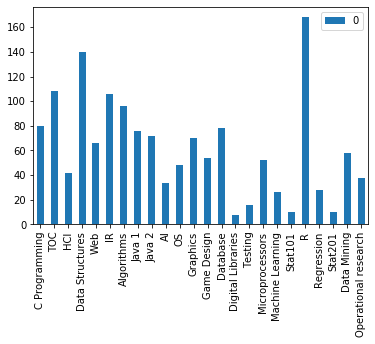

In [308]:
courses_count = {}
Courses = ['C Programming','TOC', 'HCI', 'Data Structures', 'Web','IR', 'Algorithms', 'Java 1', 'Java 2',
           'AI', 'OS', 'Graphics', 'Game Design', 'Database', 'Digital Libraries', 'Testing', 'Microprocessors',
           'Machine Learning', 'Stat101','R', 'Regression','Stat201', 'Data Mining', 'Operational research']

for c in Courses:
    courses_count[c] = student_data['Courses'].str.count(c).sum()


pd.DataFrame(courses_count.values(), index=courses_count.keys()).plot(kind='bar')

# Outlier detection 
these values could cause a Bias to the model by affecting its ability to generalize. but these could be naturally occuring. we will focus on Tukey IQR method to identify outliers. 
  ## Tukey IQR.
   - identify external values in data.
   - outliers are defined as: values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR
   - makes no assumptions about normally distributed data.
   - not very sensitive to very external values.
 ![outliers](Assests/outliers.png)

In [309]:
def find_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5 * iqr
    ceiling = q3 + 1.5 * iqr 
    outlier_indices = list(x.index[(x < floor) | (x > ceiling)])
    outlier_values = list(x[outlier_indices])
    
    return outlier_indices, outlier_values

In [310]:
out_indices, out_values = find_outliers(student_data['GPA'])
print("Outlier From GPA:", np.sort(out_values))
out_indices, out_values = find_outliers(student_data['CGPA'])
print("Outlier From CGPA: ", out_values, "indices: ", out_indices)


Outlier From GPA: []
Outlier From CGPA:  [1.84, 1.84] indices:  [86, 199]


In [311]:
if len(out_indices) > 0:
    student_data.drop(student_data.index[out_indices], inplace=True)
    print("Succfully outliers removed.")
else:
    print("No outliers to remove.")

Succfully outliers removed.


# Check for missing values 

In [312]:
student_data.isnull().sum().sort_index()/len(student_data)

CGPA                 0.0
Courses              0.0
Department           0.0
EnglishLevel         0.0
ExtraActivities      0.0
FarHome              0.0
FinantialLevel       0.0
FrequentAbcense      0.0
GPA                  0.0
Gender               0.0
GroupsResources      0.0
HasAJob              0.0
HealthProblems       0.0
InvolvmentLevel      0.0
Level                0.0
ParentsHaveDegree    0.0
StudentGuardian      0.0
dtype: float64

As an initial dimensionality reduction step. you can remove features that is abviously can't affect the model. I think that gender can't help much in shuch model as the perpous of that model is to generalize a learning experience for a student. and analyze there performance.

In [313]:
student_data.drop("Gender", axis=1, inplace=True)

# How to handle categorical variables?

This dataset contains a mix of continuous and categorical variables. The categorical variables are currently stored as **object** data type, which is inefficient, and doesn't provide the 
numeric coding required for a machine learning algorithm. Therefore we call **train_cats** to convert strings to pandas categories.

a catigorical variable can be ordinal or nominal varable which have different interpretation on the data 
1. Nominal variable: hold values that there is no intrinsic ordering to the categories.
    - Department.
    - Courses.
    - HasAJob.
    - GroupsResources
    - ExtraActivities.
 
2. Ordinal variable: This kind of categorical variables holds values that have a clear ordering.
    - InvolvmentLevel.
    - FarHome.
    - FinantialLevel.
    - FrequentAbcense.
    - HealthProblems.
    - ParentsHaveDegree.
    - EnglishLevel.
    - StudentGuardian.


In [314]:
nominal_variables = [ "Department", "HasAJob", "GroupsResources", "ExtraActivities",]
student_data = helper.one_hot_encoding(nominal_variables, student_data)


In [315]:
student_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Level,4,4,4,4,4,4,4,4,4,4
Courses,"C Programming, TOC, HCI, Data Structures, Web,...","Java 1, Java 2, IR, Database, Regression","TOC, Data Structures, IR, Algorithms, OS, Micr...","C Programming, TOC, Data Structures, IR, Algor...","Data Structures, Algorithms, Game Design, Micr...","C Programming, Data Structures, Web, Java 2, I...","Data Structures, Web, Java 1, Java 2, Algorith...","TOC, Data Structures, IR, Algorithms, Regression","TOC, Data Structures, IR, Algorithms","C Programming, Data Structures, IR, Algorithms..."
GPA,2.5,3.6,2.6,3.69,4,2.93,3,3.54,2.7,3.1
CGPA,2.8,3.1,2.77,3.59,3.35,3,2.6,3.33,3,2.78
InvolvmentLevel,Average,Average,High,High,High,Low,Average,Average,High,Average
FarHome,No,Yes,Yes,No,Yes,No,No,Yes,Yes,No
FinantialLevel,High,Average,Average,Average,High,Average,Average,Average,Average,Average
FrequentAbcense,No,Yes,No,No,No,Yes,Yes,Yes,No,Yes
HealthProblems,No,No,No,No,No,No,No,No,No,No
ParentsHaveDegree,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [316]:
Courses = ['C Programming','TOC', 'HCI', 'Data Structures', 'Web','IR', 'Algorithms', 'Java 1', 'Java 2',
           'AI', 'OS', 'Graphics', 'Game Design', 'Database', 'Digital Libraries', 'Testing', 'Microprocessors',
           'Machine Learning', 'Stat101','R', 'Regression','Stat201', 'Data Mining', 'Operational research']


student_data = helper.courses_one_hot_encodeing(Courses, student_data)

student_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
Level,4,4,4,4,4,4,4,4,4,4
GPA,2.5,3.6,2.6,3.69,4,2.93,3,3.54,2.7,3.1
CGPA,2.8,3.1,2.77,3.59,3.35,3,2.6,3.33,3,2.78
InvolvmentLevel,Average,Average,High,High,High,Low,Average,Average,High,Average
FarHome,No,Yes,Yes,No,Yes,No,No,Yes,Yes,No
FinantialLevel,High,Average,Average,Average,High,Average,Average,Average,Average,Average
FrequentAbcense,No,Yes,No,No,No,Yes,Yes,Yes,No,Yes
HealthProblems,No,No,No,No,No,No,No,No,No,No
ParentsHaveDegree,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
EnglishLevel,Advanced,Intermediate,Advanced,Advanced,Intermediate,Advanced,Advanced,Intermediate,Intermediate,Intermediate


In [317]:
helper.train_cats(student_data)
student_data.dtypes

Level                   category
GPA                      float64
CGPA                     float64
InvolvmentLevel         category
FarHome                 category
FinantialLevel          category
FrequentAbcense         category
HealthProblems          category
ParentsHaveDegree       category
EnglishLevel            category
StudentGuardian         category
CS                      category
Math                    category
Stat                    category
NoHJ                    category
YesHJ                   category
Avoide                  category
Follow                  category
NoXA                    category
YesXA                   category
C Programming           category
TOC                     category
HCI                     category
Data Structures         category
Web                     category
IR                      category
Algorithms              category
Java 1                  category
Java 2                  category
AI                      category
OS        

In [318]:
ordinal_variables = ["InvolvmentLevel",
"FarHome",
"FinantialLevel",
"FrequentAbcense",
"HealthProblems",
"ParentsHaveDegree",
"EnglishLevel",
"StudentGuardian",]

student_data['FinantialLevel'].cat.categories

Index(['Average', 'High', 'Low'], dtype='object')

In [319]:
student_data['FinantialLevel'].cat.set_categories(["High", "Average", "Low"], ordered=True, inplace=True)


We are still not quite done- we need to check if there is any missing values 

# Interaction among features

When features interact with each other in a prediction model, the prediction cannot be expressed as the sum of the feature effects, because the effect of one feature depends on the value of the other feature. Aristotle’s predicate “The whole is greater than the sum of its parts” applies in the presence of interactions.
- a simple two-way interaction is represented by: x3 = x1 * x2 where x3 is the interaction between x1 and x2 
- can add interaction terms as addational new features to the model if the impact of two or more features on the outcome is non-additive
- but it is very computationally intensive: 10 features = 45 two-way interaction terms. then it recommended to be used if you know areas of interaction as a domain expert. also, it could cause the model to overfit.
- note that the interaction between dummy variables for the same catigorical variable is always zero.

we well replace ccategories with their numeric codes and split dependent variable into separate variable

In [320]:
for n, c in student_data.items():
    if not is_numeric_dtype(c):
        student_data[n] = c.cat.codes


In [321]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    #Get features name 
    combositions = list(combinations(list(df.columns), 2))
    col_names = list(df.columns) + ['_'.join(x) for x in combositions]
    
    #Find interaction 
    polynomial = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = polynomial.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = col_names
    
    #Remove interaction terms with all 0 values 
    not_int_values = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[not_int_values], axis =1 )
    return df 

In [322]:
x = add_interactions(student_data)


In [323]:
x.head(5).T

,0,1,2,3,4
Level,3.0,3.0,3.00,3.00,3.00
GPA,2.5,3.6,2.60,3.69,4.00
CGPA,2.8,3.1,2.77,3.59,3.35
InvolvmentLevel,0.0,0.0,1.00,1.00,1.00
FarHome,0.0,1.0,1.00,0.00,1.00
FinantialLevel,0.0,1.0,1.00,1.00,0.00
FrequentAbcense,0.0,1.0,0.00,0.00,0.00
HealthProblems,0.0,0.0,0.00,0.00,0.00
ParentsHaveDegree,1.0,1.0,1.00,1.00,1.00
EnglishLevel,0.0,1.0,0.00,0.00,1.00


# PCA dimensionality reduction 
- principle component analysis is a technique that transforms a dataset of many features into principal componentss that "summarize" the variance that underllies in the data.
- each principal component is calculated by finding the linear cobminatino of features that maximizes variance, while also ensuruing zero corrlation with the previously calculated components. 


In [324]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 20)
x_pca = pd.DataFrame(pca.fit_transform(student_data))

In [325]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.605919,-1.163378,-1.185123,-1.641812,-0.507782,-1.043964,0.165444,-0.565187,-0.201120,-0.048460,-0.729288,0.409295,-0.212659,0.265402,-0.039710,-0.707732,-0.090425,0.188973,-0.213194,-0.471311
1,-0.754431,-0.110424,0.174339,-0.231656,0.418453,-0.839614,0.672105,-0.306947,-0.375864,-0.960297,0.883137,0.600555,-0.131492,-0.519626,-0.414207,0.473861,0.178339,0.023891,-0.289114,0.743691
2,0.464128,-0.539036,0.671919,-1.078523,-0.394512,1.054180,0.054574,0.139446,-0.348838,0.331246,0.099597,-0.697605,0.221008,0.150616,0.388441,0.147454,0.668689,0.001468,0.618917,-0.087182
3,1.551002,-1.226097,1.918591,0.658742,-0.568571,1.009381,0.754982,0.176888,0.362272,0.262938,0.264322,0.001225,0.396839,0.586343,0.297912,-0.275953,0.545589,0.166969,0.140432,-0.140065
4,-0.056445,-0.221360,1.215457,-0.479660,-0.856185,0.164670,-0.308326,0.995683,-0.396170,0.447846,-0.140972,0.087412,0.249350,0.103684,-0.063343,0.533228,-0.677010,0.294573,0.317980,0.075601


Note that: PCA components are hard to interpret. 

# Splitting data 

It is good at running through points we gave it, but it is not going to be very good at running through points we didn’t give it. That is why we always want to have a validation set.
What you need to do is to come up with a dataset where the score of your model on that dataset is going to be **representative of how well your model is going to do in the real world**.

## what difference between a validation set and a test set?
One of the things we are going to learn today is how to set hyper parameters. Hyper parameters are **tuning parameters** that are going to change how your model behaves. If you just have one holdout set (i.e. one set of data that you are not using to train with) and we use that to decide which set of hyper parameter to use. If we try a thousand different sets of hyper parameters, we may end up overfitting to that holdout set. So what we want to do is to have a second holdout set (the test set) where we can say I have done the best I can and now just once right at the end, I am going to see whether it works.

In [326]:
from pandas.api.types import is_numeric_dtype
from sklearn.model_selection import train_test_split

In [327]:
# y: is the dependent variable (GPA)
# df: data frame contains all independet variables
y = student_data['GPA'].values
df = student_data.drop('GPA', axis=1,)


In [328]:
from sklearn.model_selection import train_test_split
# splitting data ratio 70(training)/ 30(validation)
x_train, x_valid, y_train, y_valid = train_test_split(df, y, test_size = 0.3, random_state = 50)

x_train.shape, y_train.shape, x_valid.shape

((156, 43), (156,), (68, 43))

Let sklearn handle feature reduction process.

In [329]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=20)
selected_features = select.fit(x_train, y_train)
indices_selected = selected_features.get_support(indices = True)
col_names_selected = [df.columns[i] for i in indices_selected]

x_train_selected = x_train[col_names_selected]
x_valid_selected = x_valid[col_names_selected]

In [330]:
x_train_selected.shape

(156, 20)

# Taking look into var-cov matrix of selected features

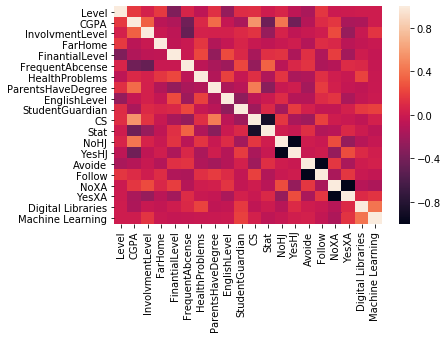

In [331]:
import seaborn as sns 
corr = x_train_selected.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [332]:
x_train_selected.head(5).T

,83,151,216,99,178
Level,3.0,3.00,2.00,2.00,3.0
CGPA,2.7,3.44,3.33,3.22,3.1
InvolvmentLevel,0.0,1.00,1.00,1.00,0.0
FarHome,1.0,1.00,0.00,0.00,1.0
FinantialLevel,1.0,0.00,1.00,1.00,0.0
FrequentAbcense,1.0,0.00,0.00,0.00,1.0
HealthProblems,1.0,1.00,0.00,0.00,0.0
ParentsHaveDegree,0.0,1.00,1.00,1.00,1.0
EnglishLevel,0.0,0.00,1.00,1.00,1.0
StudentGuardian,1.0,0.00,2.00,0.00,0.0


# Train

We now have something we can pass to a random forest!? what if we use the full dataset.

In [333]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

C:\Users\ahmed\Miniconda3\envs\Graduation_Project\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9560435652820434

## what is R²?
In statistics, the coefficient of determination, denoted R² or r² and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). In summary, **R² is the ratio between how good your model is (RMSE)vs. how good is the naïve mean model (RMSE)**. 

![r2](Assests/r2.png)

- yi : actual/target data
- ȳ : the average (mean)
- SStot: how much the data vary
- fi: predictions
- SSres is RMSE of the actual model
- If we were exactly as effective as just predicting the mean, - SSres/SStot = 1 and R² = 0
- If we were perfect (i.e. yi = fi for all cases), SSres/SStot = 0 and R² = 1


Wow, an r^2 of 0.98 - that's great, right? Well, perhaps not...

Possibly **the most important idea** in machine learning is that of having separate training & validation data sets. As motivation, suppose you don't divide up your data, but instead use all of it.  And suppose you have lots of parameters:

![overfit](Assests/overfit.png)


The error for the pictured data points is lowest for the model on the far right (the blue curve passes through the red points almost perfectly), yet it's not the best choice.  Why is that?  If you were to gather some new data points, they most likely would not be on that curve in the graph on the right, but would be closer to the curve in the middle graph.

This illustrates how using all our data can lead to **overfitting**. A validation set helps diagnose this problem.

# Evaluation Metric in terms of errors

## Root Mean Squared Logarithmic Error (RMSLE)
It is just an RMSE calculated in logarithmic scale. In fact, to calculate it, we take a logarithm of our predictions and the target values, and compute RMSE between them. The targets are usually non-negative but can equal to 0, and the logarithm of 0 is not defined. That is why a constant is usually added to the predictions and the targets before applying the logarithmic operation. This constant can also be chosen to be different to one depending on the problem. **carries about relative errors more than about absolute ones**.


![rmse](Assests/rmse.png)




In [334]:
# Since we are using the RMSLE as evaluation metric
# So we took the log of the GPA and use root mean squared error (RMSE).
student_data.GPA = np.log(student_data.GPA)

In [335]:
def rmse(y, y_hat):
    """
    use this function to evaluate RMSE
    
    parameters:
    y : actual value of the predictor
    y_hat : predicted value 
    """
    return math.sqrt(((y-y_hat)**2).mean())

def print_score(model):
    """
    use this function to have full evaluation prespective 
    about what the model do in terms of training and validation datasets
    
    parameters:
    model : evaluated model
    """
    res = { 'rmse_train': rmse(m.predict(x_train_selected), y_train),
           'rmse_validation': rmse(m.predict(x_valid_selected), y_valid),
           'r^2_score_train': m.score(x_train_selected, y_train), 
           'r^2_score_validation': m.score(x_valid_selected, y_valid)}
    if hasattr(m, 'oob_score_'):res['oob_score'] = m.oob_score_
    print(res)


In [336]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(x_train_selected, y_train)
print_score(m)

C:\Users\ahmed\Miniconda3\envs\Graduation_Project\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 119 ms
{'rmse_train': 0.10850144746759882, 'rmse_validation': 0.29547795279552636, 'r^2_score_train': 0.9580650317338927, 'r^2_score_validation': 0.687746473164867}


As you see, R² is 0.95 on the training set, and only 0.78 on the validation set which makes us think that we are overfitting quite badly. But not too badly as RMSE of 0.08.

## Execution time
it is too long to do interactive analysis with it. So what we do is we try to make sure that things can run in a reasonable time. And then when we are finished at the end of the day, we can say ok, this feature engineering, these hyper parameters, etc are all working well, and we will now re-run it the big slow precise way. here is 118 ms wich is reasonable to work with in analysis.

# Brief Explanation of Hyperparameter Tuning

The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to optimize performance, just as we might turn the knobs of an AM radio to get a clear signal (or your parents might have!). While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set by the data scientist before training. In the case of a random forest, hyperparameters include the number of decision trees in the forest and the number of features considered by each tree when splitting a node. (The parameters of a random forest are the variables and thresholds used to split each node learned during training). Scikit-Learn implements a set of sensible default hyperparameters for all models, but these are not guaranteed to be optimal for a problem. The best hyperparameters are usually impossible to determine ahead of time, and tuning a model is where machine learning turns from a science into trial-and-error based engineering.


# 1. Number of estimators
Building a single tree. We are going to build a forest made of trees. Let’s start by looking at trees. In scikit-learn, they do not call them trees but estimators.

In [337]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(x_train_selected, y_train)
print_score(m)

{'rmse_train': 0.26484316515756023, 'rmse_validation': 0.3638630595483913, 'r^2_score_train': 0.750148020911298, 'r^2_score_validation': 0.5264856733793108}


This small deterministic tree has R² of 0.79 after fitting so this is not a good model but better than the mean model since it is greater than 0 and we can actually draw.

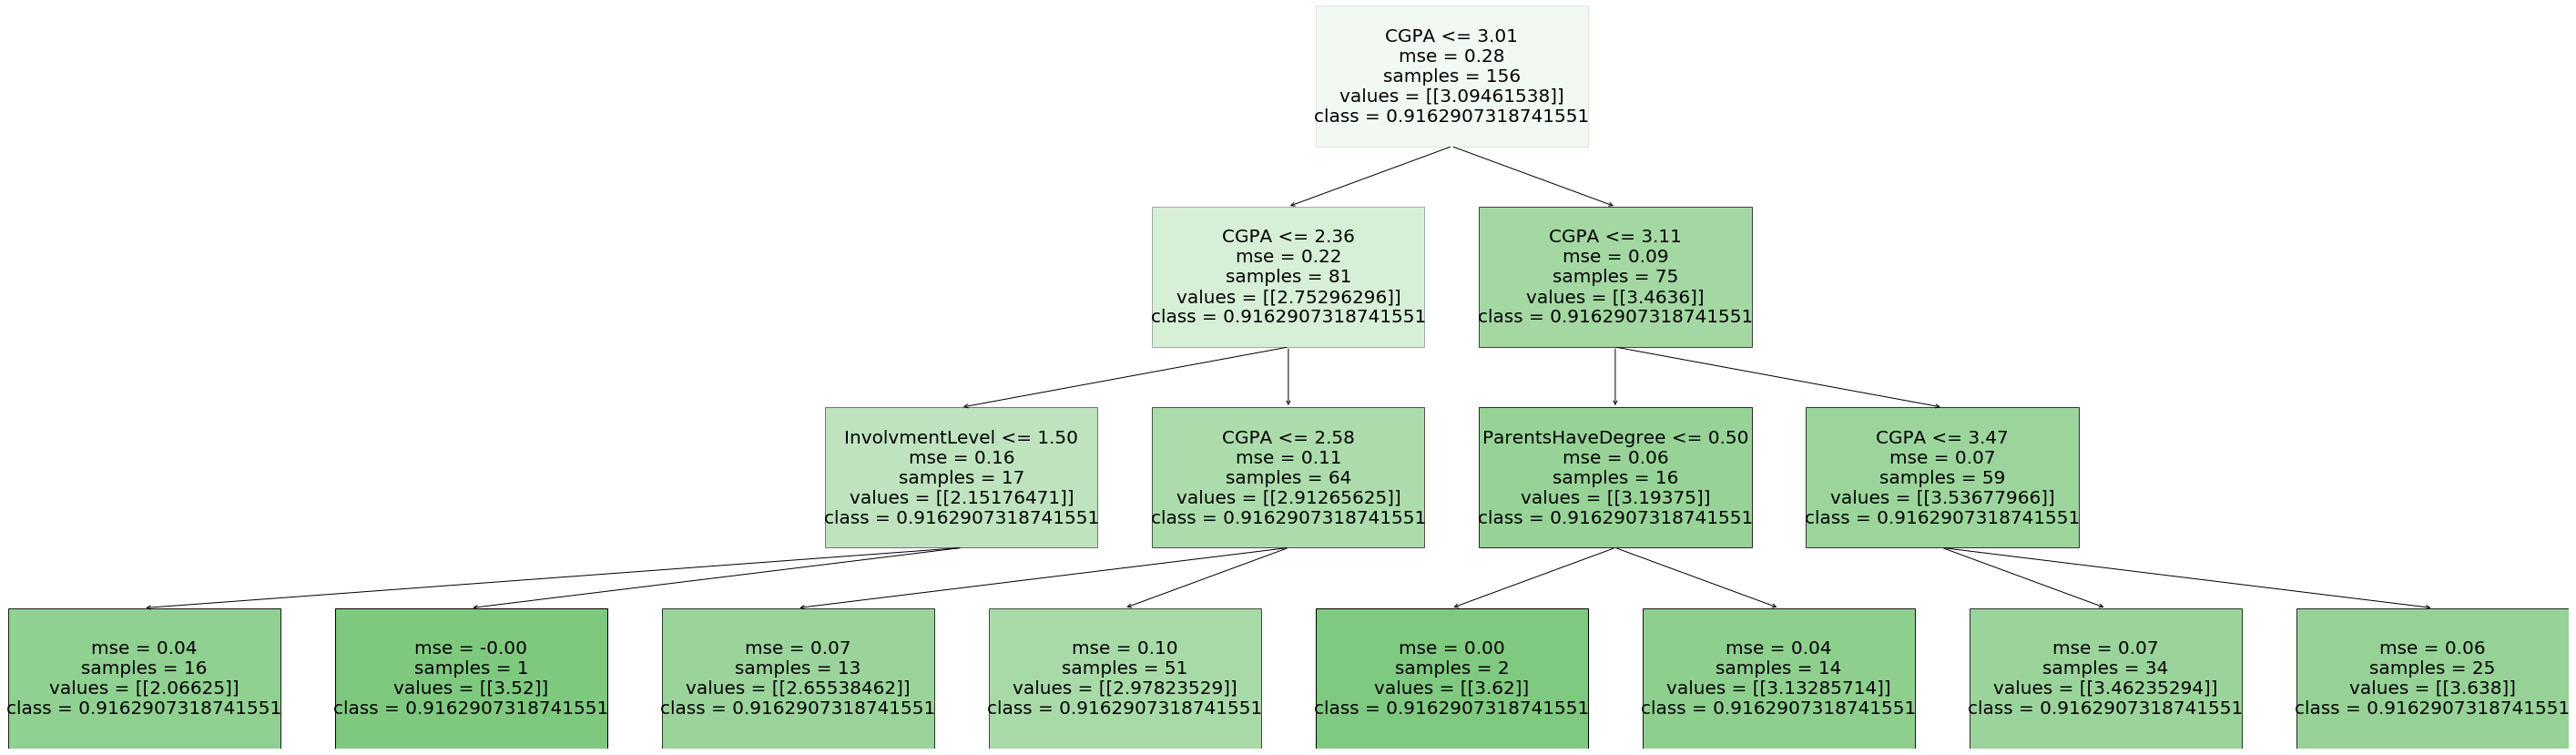

In [338]:
from dtreeplt import dtreeplt

dtree = dtreeplt(
    model=m.estimators_[0],
    feature_names=df.columns,
    target_names=y
)
fig = dtree.view()

We want to start building a random forest from scratch. The first step is to create a tree. The first step to create a tree is to create the first binary decision. How are you going to do it?

- We need to pick a variable and the value to split on such that the two groups are as different to each other as possible
- For each variable, for each possible value of the possible value of that variable see whether it is better.
- How to determine if it is better? Take weighted average of two new nodes
- The resulting model will be similar to the naïve model of means — we have a model with a single binary decision. For everybody with CGPA greater than 2.58, we will fill in 0.916, for everybody else, we will put 0.916. Then we will calculate RMSE of this model.

Let's see what happens if we create a bigger tree.

In [339]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(x_train_selected, y_train)
print_score(m)

{'rmse_train': 0.0, 'rmse_validation': 0.31070366059298743, 'r^2_score_train': 1.0, 'r^2_score_validation': 0.6547370876593103}


The training set result looks great! But the validation set is worse than our original model. This is why we need to use bagging of multiple trees to get more generalizable results.

# 2. Bagging
Michael Jordan developed a technique called the Bag of Little Bootstraps in which he shows how to use bagging for absolutely any kind of model to make it more robust and also to give you confidence intervals.

Random forest — a way of bagging trees.

So what is bagging? Bagging is an interesting idea which is what if we created five different models each of which was only somewhat predictive but the models gave predictions that were not correlated with each other. That would mean that the five models would have profound different insights into the relationships in the data. If you took the average of those five models, you are effectively bringing in the insights from each of them. So this idea of averaging models is a technique for Ensembling.

What if we created a whole a lot of trees — big, deep, massively overfit trees but each one, let’s say, we only pick a random 1/10 of the data. Let’s say we do that a hundred times (different random sample every time). They are overfitting terribly but since they are all using different random samples, they all overfit in different ways on different things. In other words, they all have errors but the errors are random. The average of a bunch of random errors is zero. If we take the average of these trees each of which have been trained on a different random subset, the error will average out to zero and what is left is the true relationship — and that’s the random forest.


The key insight here is to construct multiple models which are better than nothing and where the errors are, as much as possible, not correlated with each other.

In bagging, that means that each of your individual estimators, you want them to be as predictive as possible but for the predictions of your individual trees to be as uncorrelated as possible. The research community found that the more important thing seems to be creating uncorrelated trees rather than more accurate trees.

In [351]:
m = RandomForestRegressor(n_jobs=-1) 
m.fit(x_train_selected, y_train) 
print_score(m)

C:\Users\ahmed\Miniconda3\envs\Graduation_Project\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


{'rmse_train': 0.1077847153904248, 'rmse_validation': 0.2970371089908584, 'r^2_score_train': 0.9586172246517913, 'r^2_score_validation': 0.6844424262224889}


In [352]:

preds = np.stack([t.predict(x_valid_selected) for t in m.estimators_]) 
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([3.  , 2.8 , 3.  , 3.15, 2.6 , 3.  , 3.14, 3.  , 2.59, 3.1 ]),
 2.9379999999999997,
 3.5)

In [353]:
preds.shape

(10, 68)

In [354]:
import matplotlib.pyplot as plt

In [355]:
def r2_score(pred, targ):
    "R2 score (coefficient of determination) between `pred` and `targ`."
    u = np.sum((targ - pred) ** 2)
    d = np.sum((targ - targ.mean()) ** 2)
    return 1 - u / d

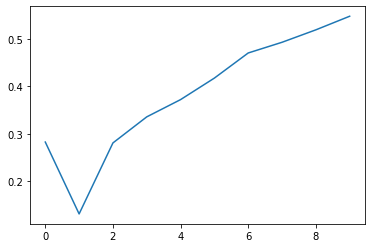

In [356]:
plt.plot([r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)])

Here is a plot of R² values given first i trees. As we add more trees, R² improves. But it seems as though it has flattened out.



In [357]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(x_train_selected, y_train)
print_score(m)

{'rmse_train': 0.0879821719448219, 'rmse_validation': 0.31905249919511197, 'r^2_score_train': 0.9724263275339251, 'r^2_score_validation': 0.6359328522627501}


# 3. Out-of-bag (OOB) score

since data is smal you will not want to pull out a validation set because doing so means you now do not have enough data to build a good model. However, random forests have a very clever trick called out-of-bag (OOB) error which can handle this (and more!)

What we could do is to recognize that in our first tree, some of the rows did not get used for training. What we could do is to pass those unused rows through the first tree and treat it as a validation set. For the second tree, we could pass through the rows that were not used for the second tree, and so on. Effectively, we would have a different validation set for each tree. To calculate our prediction, we would average all the trees where that row is not used for training. If you have hundreds of trees, it is very likely that all of the rows are going to appear many times in these out-of-bag samples. You can then calculate RMSE, R², etc on these out-of-bag predictions.

In [358]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, 
                          oob_score=True)
m.fit(x_train_selected, y_train)
print_score(m)

{'rmse_train': 0.10255198220652387, 'rmse_validation': 0.3286828255570655, 'r^2_score_train': 0.9625377918000548, 'r^2_score_validation': 0.6136230471227502, 'oob_score': 0.7581795985114748}


# 4. Min samples



In [359]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=1, 
                          n_jobs=-1, oob_score=True) 
m.fit(x_train_selected, y_train) 
print_score(m)

{'rmse_train': 0.08100091009301964, 'rmse_validation': 0.30681850294595975, 'r^2_score_train': 0.9766285825996321, 'r^2_score_validation': 0.6633177020392811, 'oob_score': 0.7646880875071385}


min_sample_leaf=3 : Stop training the tree further when a leaf node has 3 or less samples (before we were going all the way down to 1). This means there will be one or two less levels of decision being made which means there are half the number of actual decision criteria we have to train (i.e. faster training time).

For each tree, rather than just taking one point, we are taking the average of at least three points that we would expect the each tree to generalize better. But each tree is going to be slightly less powerful on its own.

By using 3 instead of 1, validation R² improved from 0.89 to 0.90

# 5. Max features

In [362]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=1, 
                      max_features=0.5, n_jobs=-1, oob_score=True) 
m.fit(x_train_selected, y_train) 
print_score(m)

{'rmse_train': 0.09768959007803948, 'rmse_validation': 0.30361243253723386, 'r^2_score_train': 0.9660060345025945, 'r^2_score_validation': 0.670317198205691, 'oob_score': 0.7669517232809335}


max_features=0.5 : The idea is that the less correlated your trees are with each other, the better. Imagine you had one column that was so much better than all of the other columns of being predictive that every single tree you built always started with that column. But there might be some interaction of variables where that interaction is more important than the individual column. So if every tree always splits on the same thing the first time, you will not get much variation in those trees.

In addition to taking a subset of rows, at every single split point, take a different subset of columns.

For row sampling, each new tree is based on a random set of rows, for column sampling, every individual binary split, we choose from a different subset of columns.